1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy

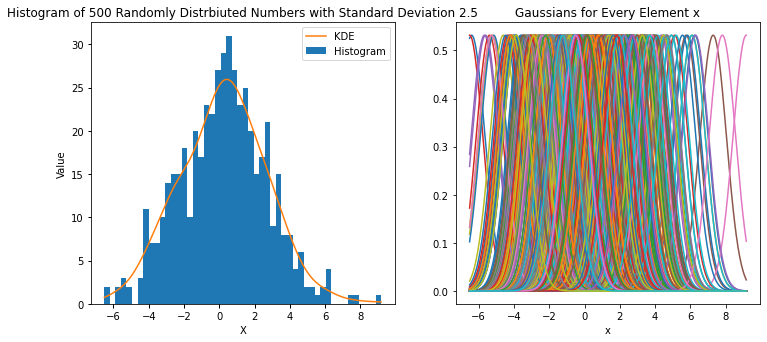

In [73]:
def kde(N, sigma):
    #create array of randomly distributed numbers
    x = np.random.normal(scale=sigma, size=N)
    
    gridsize = (3,2)
    fig = plt.figure(figsize=(12, 8))
    
    
    #histogram
    ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=1, rowspan=2)
    vals, bins, _ = ax1.hist(x, bins=N//10, label='Histogram')
    ax1.set_title(f'Histogram of {N} Randomly Distrbiuted Numbers with Standard Deviation {sigma}')
    ax1.set_ylabel('Value')
    ax1.set_xlabel('X')
    ax1.tick_params(which='major', width=1.0, labelsize=10)
    
    #Create Gaussians and range
    ax2 = plt.subplot2grid(gridsize, (0, 1), colspan=1, rowspan=2)
    stdDefault = 1.06 * x.std() * x.size**(-1/5) # std gaussians
    rng = np.linspace(min(x), max(x), N) #range for gaussians
    gaussians = list()
    for num in x:
        #Plot Gaussians and add to list
        gaussian = norm.pdf(rng, loc=num, scale=stdDefault)
        gaussians.append(gaussian)
        
        #plot
        ax2.plot(rng, gaussian)
        ax2.set_title('Gaussians for Every Element x')
        ax2.set_xlabel('x')
    gaussians = np.array(gaussians)
    
    # inegrate, normalize and plot
    sumOfGaussians = gaussians.sum(axis=0)
    binWidth = bins[1] - bins[0]
    histArea = binWidth*np.sum(vals[:])
    trapIntegral = scipy.integrate.trapz(sumOfGaussians, rng)
    
    ax1.plot(rng, sumOfGaussians*histArea/trapIntegral, label='KDE')
    ax1.legend()
    
    plt.show()
    

kde(500, 2.5)

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

In [ ]:
def createData(N, mean, cov):
    # Takes in the number of points, mean, and covariance and returns a set of data
    # drawn from multivariate normal distribution
    return np.random.multivariate_normal(mean, cov, size=N)

def nDscatter(data1, data2):
    # Takes randomly sampled multivariate data and produces scatters
    
    #Generate random means and covariances for data 
    


3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot